# **QACES feature for jargon detection in Enterprise Search.**


* [Introduction to Jargon and Enterprises](#Introduction)
* [QACES](#QACES)
* [Loading the QAC history log file](#Loading)
* [Top 65 Queries](#Top65)
* [GPT-4 Synonyms](#GPT-4)
* [LLM Synonums](#Average)
* [Jargon detection](#Jangon)
* [Jargony](#Jargony)
* [LTR feature](#LTR)
* [Repeatability](#Verification)
* [References](#References)

# **Introduction to Jargon and Enterprises**  <a class="anchor"  id="Introduction"></a>
Enterprise Search (ES) can be simply defined as finding the information needed from within an organisation.   As illustrated below, ES is a federated store of workplace information with data gathered from multiple sources, such as intranets, document management systems,
e-mail and social media and may also include the organisation’s external-facing HTTP web servers(Kraswell et al, 2005).

Query auto-completion (QAC) is of particular importance to the field of Enterprise Search, where query suggestions can steer searchers to use the appropriate organisational jargon/terminology and avoid submitting
queries that produce no results.

Excessive use of jargon and terminology in organisations is often perceived as exclusionary. We use the
terms here in a positive context for efficiently conveying complex ideas, processes, or services among
employees/members who share common knowledge of the enterprise. In this context, jargon and terminology facilitate effective communication. 

# **QACES**  <a class="anchor"  id="QACES"></a>
QACES stands for **Query Auto-Complete for Enterprise Search**.     The task of detecting enterprise jargon/terminology terms within a corpus lends itself to the fields of NLP and LLM. Once the terms have been detected, they can be ‘upranked’ in our ranking model.

In [1]:
DEBUG='FALSE'
USE_CACHED_GPT_RESULTS='FALSE'

In [2]:
import numpy as np 
import pandas as pd 
import os
import decimal  

# **Loading the QAC history logfile**  <a class="anchor"  id="Loading"></a>

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hidden-abc/abc.env
/kaggle/input/tcd-nlp-synonyms/cluster_synonyms3000.txt
/kaggle/input/es-query-history/ws-query-history-v25.txt
/kaggle/input/es-query-history/es-query-history-v25.txt


In [4]:
# import the ES two-column query history 
query_history_file="/kaggle/input/es-query-history/es-query-history-v25.txt"
column_names = ['queries', 'volume']
es_df = pd.read_csv(
    query_history_file,
    sep ="\t",
    names=column_names,
    header=None
)

# add a counter column
initial_value = 1
es_df['counter'] = range(initial_value, len(es_df) +initial_value)

# **Top 65 Queries**  <a class="anchor"  id="Top65"></a>

In [5]:
# Truncate to use just top 65 queries 
# Without this truncation, the long tail will be excessively right-skewed
es_df = es_df.head(65)

In [6]:
from IPython.display import display_html 

number=65
es_df_top=es_df.head(number)

es_df_styler = es_df_top.style.set_table_attributes("style='display:inline'").set_caption('<b>ES Top Query Terms</b>')

#display_html(es_df_styler._repr_html_()+ws_df_styler._repr_html_(), raw=True)
display_html(es_df_styler._repr_html_(), raw=True)

,queries,volume,counter
0,scholarship,2148,1
1,fees,1941,2
2,library,1849,3
3,phd,1751,4
4,medicine,1573,5
5,psychology,1421,6
6,erasmus,1322,7
7,courses esc,1190,8
8,vacancies,1153,9
9,law,1128,10


# **GPT-4 Synonyms**  <a class="anchor"  id="GPT-4"></a>

In [7]:
try:
    import openai
except:
    !pip install openai
    import openai
    
from openai import OpenAI


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 6.0 MB/s eta 0:00:00


In [8]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv("/kaggle/input/hidden-abc/abc.env")
openai.api_key=os.getenv("OPENAI_API_KEY")

#print(openai.api_key)

In [9]:
arr = es_df_top['queries'].values.tolist()
print (arr)

['scholarship', 'fees', 'library', 'phd', 'medicine', 'psychology', 'erasmus', 'courses esc', 'vacancies', 'law', 'scholarships', 'accommodation', 'calendar', 'jobs', 'accomodation', 'computer science', 'accommodation contactus', 'apply', 'tuition', 'accommodation studentsandstaff', 'hr', 'english', 'book of kells', 'mba', 'engineering', 'music', 'business', 'secretary communications noticeboard', 'international', 'history', 'blackboard', 'nursing', 'courses', 'open day', 'application', 'graduatestudies students prospective awards', 'library bookofkells', 'fee', 'business msc international requirements', 'pharmacy', 'library bookofkells old library', 'human resources', 'dentistry', 'finance', 'master', 'careers', 'economics', 'exchange', 'ahss columbia', 'marketing', 'creativearts students current', 'film', 'study abroad', 'academic registry', 'orientation', 'architecture', 'masters', 'handbook', 'philosophy', 'admission', 'admissions', 'fis', 'data science', 'procurement', 'business m

**We need to break down the above array into smaller chunks to satisfy gpt-4 requirements.  Otherwise, the following message may appear: -**

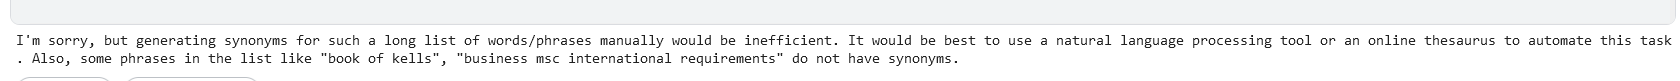

In [10]:
client = OpenAI()
MODEL = "gpt-4"
n = 8
s = 0
#  {"role": "user", "content":  "please list them in lower case letters with a comma separator'}, 

if USE_CACHED_GPT_RESULTS != 'TRUE': 
    !rm -f /kaggle/working/LLM-synonyms.json
    for s in 0,8,16,24,32,40,48,56,64:
    #for s in 0,8,16:
        short_list = str(arr[s:n+s])[1:-1] 
        my_messages=[
            {"role": "user", "content": "create a flat, json-formatted, sorted, unnumbered list of the top 10 synonyms words or phrases for each of the words in the following array: -"}, 
            {"role": "user", "content": "Your output must always be in comma separated format, for example: \"word: synonym1, synonym2, synonym3, etc\""},
            {"role": "user", "content": short_list},
            ]
        response = client.chat.completions.create(
        model=MODEL,
        messages=my_messages,
        temperature=0,
        )
        with open('LLM-synonyms.json', 'a') as f:
            print (response.choices[0].message.content, file=f)



Sorry, there seems to be a misunderstanding. The words "business", "msc", and "unibuddy" are likely contextually dependent and may not have clear synonyms. Synonyms for "business" might include "commerce", "trade", "industry", "market", etc. However, "msc" is normally an abbreviation for Master of Science, which has no synonym, and "unibuddy" seems to be the name of a particular platform or product, again with no obvious synonyms. If you're looking for synonyms for different words or maybe different representations of these terms, consider providing a bit more context.


In [11]:
# file size
!wc -l /kaggle/working/LLM-synonyms.json

128 /kaggle/working/LLM-synonyms.json


In [12]:
!cat /kaggle/working/LLM-synonyms.json | sed 's/[1-9]\.//' | grep \: | sed 's/[^\x00-\x7F]//g' | sed 's/\[//g' |  sed 's/\],//g'| sed 's/":/",/g' |  sed "s/:/,/g" | sed 's/"//g' | sed "s/'//g" |  sed 's/-$//' | sed 's/,$//' | sed 's/\.$//' | sed 's/-//g' | awk '{$1=$1};1' | sed -e 's/\(.*\)/\L\1/' | sed 's/\0x02BC//g'  | grep -vi synonym | grep -vi sorry | grep -vi apolog | grep -vi json > /kaggle/working/LLM-synonyms.csv
!wc -l /kaggle/working/LLM-synonyms.csv 
#!head -5 /kaggle/working/LLM-synonyms.csv
#!tail -5 /kaggle/working/LLM-synonyms.csv
!cat  /kaggle/working/LLM-synonyms.csv

59 /kaggle/working/LLM-synonyms.csv
scholarship, grant, bursary, fellowship, financial aid, award, stipend, subsidy, assistance, endowment, aid
fees, charges, cost, price, payment, rate, expense, levy, tariff, dues, toll
library, bookstore, archive, repository, collection, depository, index, catalogue, database, anthology, compendium
phd, doctorate, doctors degree, doctor of philosophy, highest degree, advanced degree, postgraduate degree, doctoral degree, doctor, dphil, dsocsci
medicine, medication, drug, remedy, cure, treatment, pharmaceutical, prescription, medicament, therapy, healing
psychology, psychoanalysis, behaviorism, cognition, mental processes, mind study, psych, mental science, study of the mind, psychobiology, neuropsychology
erasmus, exchange program, student exchange, study abroad program, international study, academic exchange, scholarship program, mobility program, educational exchange, learning abroad, international education
courses esc, classes, curriculum, progra

In [13]:
#import the above LLM's into a pandas table
import pandas as pd

# Input
data_file = "/kaggle/working/LLM-synonyms.csv"

# Delimiter
data_file_delimiter = ','

# The max column count a line in the file could have
largest_column_count = 0

# Loop the data lines
with open(data_file, 'r') as temp_f:
    # Read the lines
    lines = temp_f.readlines()

    for l in lines:
        # Count the column count for the current line
        column_count = len(l.split(data_file_delimiter)) + 1
        
        # Set the new most column count
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

# Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
column_names = [i for i in range(0, largest_column_count)]

# Read csv
df_llm = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)
#df_llm = pd.read_json(data_file)

#df_llm = df.replace({'=>cl_[0-9]+$': ''}, regex=True)
print(df_llm.fillna("").head(5))
df_llm.shape


            0            1                2                      3   \
0  scholarship        grant          bursary             fellowship   
1         fees      charges             cost                  price   
2      library    bookstore          archive             repository   
3          phd    doctorate   doctors degree   doctor of philosophy   
4     medicine   medication             drug                 remedy   

                4                 5                     6                 7   \
0    financial aid             award               stipend           subsidy   
1          payment              rate               expense              levy   
2       collection        depository                 index         catalogue   
3   highest degree   advanced degree   postgraduate degree   doctoral degree   
4             cure         treatment        pharmaceutical      prescription   

            8           9            10 11  
0   assistance   endowment          aid     
1 

(59, 12)

In [14]:
import nltk
from nltk.corpus import wordnet as wn

try:
    nltk.data.find('/kaggle/working/corpora/wordnet/lexnames')
    print ("wordnet already installed")
    !ls /kaggle/working/corpora/wordnet.zip
except LookupError:
    print ("installing wordnet")
    nltk.download('wordnet', download_dir='/kaggle/working/')  #nltk.download('wordnet', '/usr/share/nltk_data')
    !ls /kaggle/working/corpora/wordnet.zip
    !cd /kaggle/working/corpora; unzip -o wordnet.zip
    

    
#from nltk.corpus import wordnet as wn
nltk.data.path.append('/kaggle/working/')
#nltk.data.path
wn.synsets('dog')

installing wordnet
[nltk_data] Downloading package wordnet to /kaggle/working/...
/kaggle/working/corpora/wordnet.zip
Archive:  wordnet.zip
   creating: wordnet/
  inflating: wordnet/lexnames        
  inflating: wordnet/data.verb       
  inflating: wordnet/index.adv       
  inflating: wordnet/adv.exc         
  inflating: wordnet/index.verb      
  inflating: wordnet/cntlist.rev     
  inflating: wordnet/data.adj        
  inflating: wordnet/index.adj       
  inflating: wordnet/LICENSE         
  inflating: wordnet/citation.bib    
  inflating: wordnet/noun.exc        
  inflating: wordnet/verb.exc        
  inflating: wordnet/README          
  inflating: wordnet/index.sense     
  inflating: wordnet/data.noun       
  inflating: wordnet/data.adv        
  inflating: wordnet/index.noun      
  inflating: wordnet/adj.exc         


[Synset('dog.n.01'),
 Synset('frump.n.01'),
 Synset('dog.n.03'),
 Synset('cad.n.01'),
 Synset('frank.n.02'),
 Synset('pawl.n.01'),
 Synset('andiron.n.01'),
 Synset('chase.v.01')]

In [15]:
#!cd /kaggle/working/corpora/
!ls -l /kaggle/working/corpora
#print(nltk.find('wordnet.zip'))

total 10528
drwxrwxr-x 2 root root     4096 Sep 19  2015 wordnet
-rw-r--r-- 1 root root 10775600 May  7 13:46 wordnet.zip


# **NLP Synonyms**  <a class="anchor"  id="NLP"></a>

In [16]:
!grep -ni ^"academic registry" /kaggle/input/tcd-nlp-synonyms/cluster_synonyms3000.txt

81:academic registry,admissions office,advanced entry=>cl_80


In [17]:
#nlp synonyms that match top 65 queries
import pandas as pd
#nlp_df = pd.read_csv('/kaggle/input/tcd-nlp-synonyms/cluster_synonyms3000.txt',na_values='NaN')

#!grep query ^file


# Input
data_file = "/kaggle/input/tcd-nlp-synonyms/cluster_synonyms3000.txt"

col_list = [0,1,2,3,4,5,6,7,8,9]


# Delimiter
data_file_delimiter = ','

# The max column count a line in the file could have
largest_column_count = 0

# Loop the data lines
with open(data_file, 'r') as temp_f:
    # Read the lines
    lines = temp_f.readlines()

    for l in lines:
        # Count the column count for the current line
        column_count = len(l.split(data_file_delimiter)) + 1
        
        # Set the new most column count
        largest_column_count = column_count if largest_column_count < column_count else largest_column_count

# Generate column names (will be 0, 1, 2, ..., largest_column_count - 1)
column_names = [i for i in range(0, largest_column_count)]

# Read csv
df_nlp = pd.read_csv(data_file, header=None, delimiter=data_file_delimiter, names=column_names)

df_nlp = df_nlp[col_list]
df_nlp = df_nlp.replace({'=>cl_[0-9]+$': ''}, regex=True)
print(df_nlp.fillna("").head(10))
df_nlp.shape


                        0                         1                   2  \
0            mailing list             mailing lists                       
1                  grouse                                                 
2                 diploma                   masters     masters courses   
3              employment  employment opportunities   job opportunities   
4            january 2022                term dates                       
5                  dargan                       m17      semester dates   
6  educational psychology                                                 
7       business analysis        business analytics  msc human resource   
8         colm cunningham            kingston mills                       
9                   tr031                     tr032               tr033   

                3      4      5      6 7 8 9  
0                                             
1                                             
2  masters degree                

(1000, 10)

# **Jargon Detection**  <a class="anchor"  id="Jargon"></a>

In [18]:
merged_df = pd.merge(df_llm, df_nlp, on=0)
merged_df.shape


(20, 21)

In [19]:
print (merged_df.head(5))
print (merged_df.iloc[:, 0])
#print (merged_df.iloc[12:,])



               0          1_x         2_x          3_x             4_x  \
0        library    bookstore     archive   repository      collection   
1       medicine   medication        drug       remedy            cure   
2      vacancies     openings   positions         jobs   opportunities   
3  accommodation      lodging     housing    residence        quarters   
4       calendar     schedule   timetable       agenda           diary   

           5_x              6_x            7_x          8_x           9_x  \
0   depository            index      catalogue     database     anthology   
1    treatment   pharmaceutical   prescription   medicament       therapy   
2        posts            slots         places   situations   employments   
3        rooms       apartments         places       suites        condos   
4      planner          almanac       datebook   chronology    time frame   

   ...  11          1_y                    2_y  3_y  4_y  5_y  6_y  7_y  8_y  \
0  ... NaN  

# **Jargony**  <a class="anchor"  id="Jargony"></a>

In [20]:
def jaccard_jargony(list1, list2):
    # inverse of jaccard, i.e. big number means big distance, which means more 'jargony'
    set1 = set(list1)
    set2 = set(list2)
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    #print (set2-set1)   # the words in list2 that do not exist in list1
    number = (1/(intersection / union))
    decimal_value = decimal.Decimal(number)  
    rounded_number = decimal_value.quantize(decimal.Decimal('0.00'))  
    return rounded_number
    #print (set2-set1)

In [21]:
max_rows=len(merged_df)
#print (max_rows)

column=10

import re

for row in range(0,max_rows):
    list_1=merged_df.iloc[row:row+1, : column:].values.tolist()
    list_1 =str(list_1).replace('[[', '[').replace(']]', ']')
    list_2_real=merged_df.iloc[row:row+1 :, -column:].values.tolist()     
    list_2 =str(list_2_real).replace('[[', '[').replace(']]', ']')  
    
    list_3=merged_df.iloc[row:row+1:,0].values+str(list_2).replace('nan','').replace(']', '').replace('[', '').replace(']', '').replace(',', '').replace('\'', '')+str((jaccard_jargony(list_2,list_1)))
    with open('list_3.txt', 'a') as f:
        print(list_3, file=f) 





!cat list_3.txt | sed 's/[][]//g' | sed "s/[']//g"  > final_list.txt
!head -50 final_list.txt

library tcd library        1.67
medicine         3.67
vacancies vacancy        2.30
accommodation campus student accommodation       1.29
calendar         4.17
accomodation         3.67
computer science statistics        2.27
music musicology        1.40
business fice ficial ficial services      1.92
history         3.50
blackboard distance learning online       1.24
courses degree courses postgraduate students teaching undergraduate undergraduate courses undergraduates  1.28
open day open days        1.92
application application requirements applications       1.21
master         4.17
economics geography political science political science department sociology     1.20
admission admissions        2.08
fis         4.00
business fice ficial ficial services      2.00
msc phd post graduate       1.35


In [22]:
#list1=[print(*row, sep=', ') for row in merged_df.iloc[1:, : 10].values.tolist()];


In [23]:
word2vec_list = ["Office of the registrar", "university records office", "student registration office", "Dean's office", "Admissions office", "students records office", "academic office", "enrolment office", "academic affairs office", "education office"]
llm_list = ["Office of the registrar", "university records office", "Bizarre", "education office"]


In [24]:
jaccard_jargony(word2vec_list,llm_list)

Decimal('3.67')

# **LTR Feature**  <a class="anchor"  id="LTR"></a>

# **References**  <a class="anchor"  id="References"></a>